## This script contains the following points:¶

1. Import libraries and data sets.
2. Drop nonpertinent columns and split data into train and test sets.
3. Run decision tree model with markdown comments and confusion matrix.
4. Run artificial neural network model with markdown comments and confusion matrices for at least three training and testing scenarios.

### 1. Import libraries and data sets.

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Establish path.

path = r'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 1'
path

'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 1'

In [3]:
# Import data set.

df = pd.read_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
# Import pleasant weather answers data set.

df_pleasantweather = pd.read_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)
df_pleasantweather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Drop nonpertinent columns and split data into train and test sets.

In [5]:
# Get list of columns that contain mean temperatures.

mean_list = [x for x in df.columns if 'mean' in x]
mean_list

['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']

In [6]:
# Reduce data set to just the mean temperatures.

df_mean_temps = df[['DATE','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [7]:
df_mean_temps

,DATE,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,6.5,3.7,2.4,9.3,10.0,0.8,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,7.8,-5.9,4.2,10.0,8.5
1,19600102,6.1,2.9,2.3,7.7,8.2,1.6,6.1,7.7,2.1,8.6,9.8,6.2,3.4,12.2,-9.5,4.0,9.5,8.9
2,19600103,8.5,3.1,2.7,6.8,7.1,0.7,8.4,6.5,4.6,6.9,8.6,5.8,1.9,10.2,-9.5,2.4,10.3,10.5
3,19600104,6.3,2.0,2.0,6.7,6.8,-0.1,9.4,5.8,3.2,7.0,10.3,3.9,3.0,10.8,-11.5,1.2,11.2,7.4
4,19600105,3.0,2.0,2.5,8.0,7.7,0.4,8.9,5.4,3.6,8.1,12.1,1.8,3.7,9.9,-9.3,3.3,11.4,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,15.9,18.2,11.7,15.7,17.8,11.5,16.4,9.1,14.7,18.6,20.0,14.3,9.7,15.4,0.6,11.5,19.9,10.7
22946,20221028,16.7,15.9,11.7,16.0,19.4,11.7,15.8,9.1,12.9,18.9,19.1,16.1,10.9,15.4,2.3,12.5,20.3,10.7
22947,20221029,16.7,13.4,11.7,15.8,18.2,14.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,15.4,3.3,13.1,20.6,10.7
22948,20221030,15.4,15.0,11.7,14.4,16.7,11.0,15.2,9.1,14.0,16.3,15.7,14.5,5.9,15.4,3.4,7.5,15.9,10.7


In [8]:
# Export dataframe as .csv.

df_mean_temps.to_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'Dataset_meantemps_unscaled.csv'))

In [9]:
# Subset mean temperatures data to only include cities in pleasant weather data.

df_temps_subset = df_mean_temps[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean',
       'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean',
       'KASSEL_temp_mean', 'LJUBLJANA_temp_mean',
       'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].copy()
df_temps_subset

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5
1,6.1,2.9,2.3,7.7,8.2,6.1,7.7,2.1,8.6,9.8,6.2,3.4,-9.5,4.0,8.9
2,8.5,3.1,2.7,6.8,7.1,8.4,6.5,4.6,6.9,8.6,5.8,1.9,-9.5,2.4,10.5
3,6.3,2.0,2.0,6.7,6.8,9.4,5.8,3.2,7.0,10.3,3.9,3.0,-11.5,1.2,7.4
4,3.0,2.0,2.5,8.0,7.7,8.9,5.4,3.6,8.1,12.1,1.8,3.7,-9.3,3.3,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,15.9,18.2,11.7,15.7,17.8,16.4,9.1,14.7,18.6,20.0,14.3,9.7,0.6,11.5,10.7
22946,16.7,15.9,11.7,16.0,19.4,15.8,9.1,12.9,18.9,19.1,16.1,10.9,2.3,12.5,10.7
22947,16.7,13.4,11.7,15.8,18.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,3.3,13.1,10.7
22948,15.4,15.0,11.7,14.4,16.7,15.2,9.1,14.0,16.3,15.7,14.5,5.9,3.4,7.5,10.7


In [10]:
# Drop DATE column from pleasant weather data.

df_pleasant_subset = df_pleasantweather.drop(['DATE'], axis=1)
df_pleasant_subset

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Define X value.

X = df_temps_subset

In [12]:
# Define y value.

y = df_pleasant_subset

In [13]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Examine train and test set shapes.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


### 3. Run decision tree model with markdown comments and confusion matrix.

[Text(0.37952522413161127, 0.9848484848484849, 'x[8] <= 12.65\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.11528640092642227, 0.9545454545454546, 'x[9] <= 12.85\ngini = 0.1\nsamples = 10533\nvalue = [[9904, 629]\n[8963, 1570]\n[9386, 1147]\n[10387, 146]\n[10252, 281]\n[9925, 608]\n[10372, 161]\n[9675, 858]\n[10371, 162]\n[8015, 2518]\n[10179, 354]\n[10307, 226]\n[10533, 0]\n[10323, 210]\n[10376, 157]]'),
 Text(0.05092272328268674, 0.9242424242424242, 'x[2] <= 12.85\ngini = 0.036\nsamples = 7471\nvalue = [[7332, 139]\n[6811, 660]\n[7118, 353]\n[7426, 45]\n[7390, 81]\n[7407, 64]\n[7409, 62]\n[7243, 228]\n[7418, 53]\n[7252, 219]\n[7318, 153]\n[7435, 36]\n[7471, 0]\n[7438, 33]\n[7459, 12]]'),
 Text(0.029100074748450146, 0.8939393939393939, 'x[1] <= 12.05\ngini = 0.01

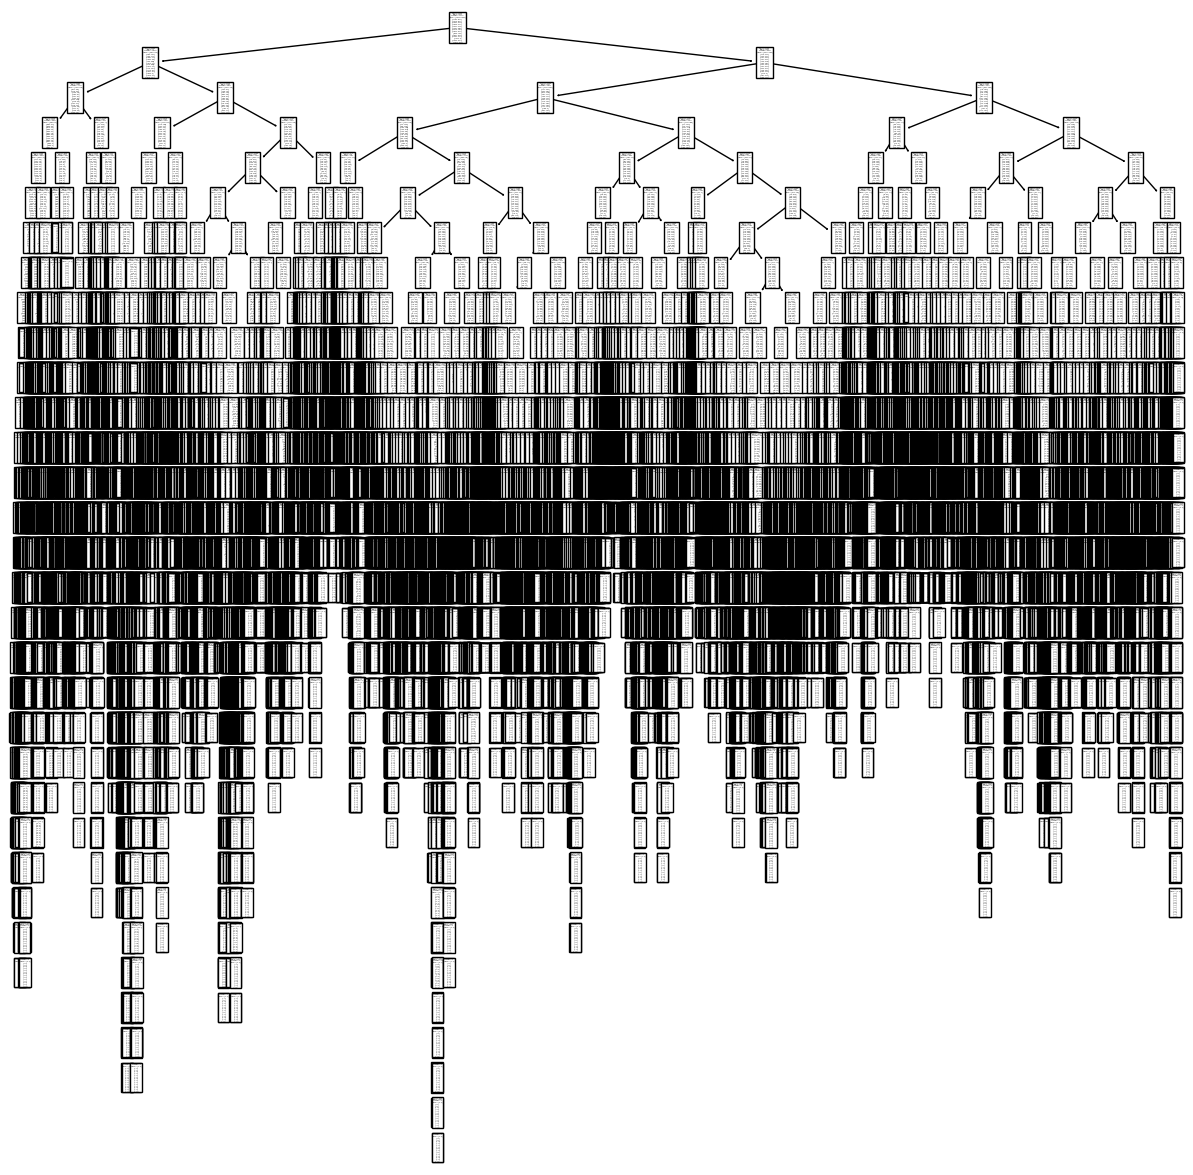

In [18]:
# Run Decision Tree classifier.

temps_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
temps_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(temps_dt)

In [19]:
# Examine y_train set.

y_train

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
8196,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0
20472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
21575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
# Examine y_test set.

y_test

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
19955,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10815,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3125,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
18985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0
7946,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3579,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
14681,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [21]:
# Calculate training accuracy score using the cross validation method.

y_pred_train = temps_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(temps_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.3999533783615612


In [22]:
# Test model performance by calculating accuracy on test set.

y_pred_test = temps_dt.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
print('Test accuracy score: ',score)

Test accuracy score:  0.4018821889159986


I think the decision tree needs pruning basedon its accuracy scores and the large number of nodes it contains. The tree appears to be overfit.

In [23]:
# Reshape y_test set for confusion matrix.

y_test_flat = y_test.values.reshape(-1,1)

In [24]:
# Check y_test_flat shape.

y_test_flat.shape

(86070, 1)

In [25]:
# Reshape y_pred_test.

y_pred_flat = y_pred_test.reshape(-1,1)

In [26]:
# Check shape of y_pred_flat.

y_pred_flat.shape

(86070, 1)

In [27]:
# Check output of y_pred_flat.

y_pred_flat

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

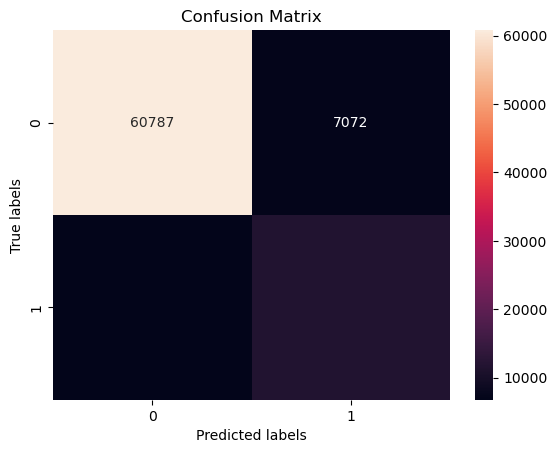

In [28]:
# Create confusion matrix based on the last "k" in the sequence.

ax= plt.subplot()

cm = confusion_matrix(y_test_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [29]:
# Print confusion matrix label annotations.

cm

array([[60787,  7072],
       [ 6785, 11426]])

### 4. Run artificial neural network model with markdown comments and confusion matrices for at least three training and testing scenarios.

In [30]:
# Investigate unscaled data.

X_train[:10]

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
8196,20.4,22.5,22.5,16.3,18.8,15.8,17.1,19.2,17.7,24.8,19.1,10.5,2.3,8.5,15.6
20472,-1.8,-3.6,-3.3,-2.5,-3.6,1.3,9.1,-4.4,-3.8,5.8,-4.8,-11.2,-17.4,-6.9,10.7
18269,-1.8,3.2,-0.4,-4.9,-5.4,-2.8,-6.2,0.6,-6.1,2.1,-2.4,-14.4,-14.1,-8.3,1.0
7713,-1.4,0.7,1.5,0.2,-0.7,2.4,-2.9,-0.4,-1.0,2.3,-4.2,-6.5,-20.9,-2.2,6.8
21958,6.1,6.7,6.2,5.7,5.0,7.2,9.1,6.6,5.9,11.0,5.2,0.6,-14.7,1.0,10.7
11464,18.3,18.7,18.7,12.1,13.6,16.6,13.4,19.1,13.9,18.8,18.3,11.4,-2.6,10.0,13.1
3984,3.7,4.4,4.7,5.2,6.9,10.4,2.8,1.4,7.0,13.2,-2.0,-2.1,-2.6,1.1,10.9
4752,-3.9,0.5,2.1,2.3,2.3,8.8,0.0,0.8,3.2,6.5,-2.1,-0.4,-10.3,1.3,10.5
11092,15.7,21.3,20.6,13.5,16.0,17.3,13.8,18.3,14.8,19.2,14.5,12.8,-0.7,11.9,12.6
21377,18.8,23.6,21.6,19.0,20.4,19.4,9.1,19.6,20.3,26.8,18.2,21.5,4.4,20.0,10.7


In [31]:
# Scale the data.

scaler = StandardScaler()

# Fit the train data.
scaler.fit(X_train)

# Scale the X data.

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [32]:
# Assign the scaled data to DataFrames.

X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

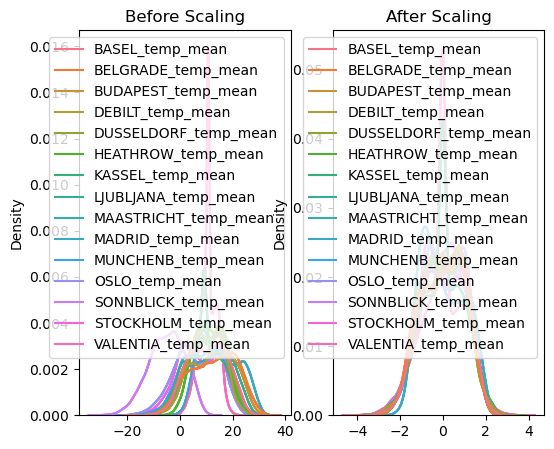

In [33]:
# Show scaling differences.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)
sns.kdeplot(X_train, ax=ax1)
sns.kdeplot(X_train, ax=ax1)
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df, ax=ax2)
sns.kdeplot(X_train_df, ax=ax2)
sns.kdeplot(X_train_df, ax=ax2)
sns.kdeplot(X_train_df, ax=ax2)

plt.show()

Scaling does appear to make a difference in this scenario, particularly with Sonnblick mean temperatures that appear as outliers before scaling.

In [34]:
# Create the ANN.
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model.
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [35]:
# Test accuracy.

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4335347432024169
0.4348204949459742


In [36]:
y_pred

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [37]:
y_train

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
8196,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0
20472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
21575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [40]:
y_pred.shape

(17212, 15)

In [41]:
y_train.shape

(17212, 15)

In [39]:
# Create the ANN with a more complicated network.
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp1 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [40]:
# Test accuracy.

y_pred = mlp1.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp1.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.43399953520799445
0.43691181596375045


In [41]:
#Create the ANN.

#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp2 = MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=700, tol=0.0001)
#Fit the data to the model
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=700)

In [42]:
# Test accuracy.

y_pred = mlp2.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp2.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6633743899604927
0.4304635761589404


As far as which combination drives the best accuracy of the training and testing data, three hidden layers with 300, 200, and 100 nodes produces the highest accuracy score for y_pred of the three ANN attempts, but the y_test accuracy score is lower than the initial two attempts.

In [43]:
# Define locations.

locations = list({x.split("_")[0] for x in df_temps_subset.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

NameError: name 'labels' is not defined

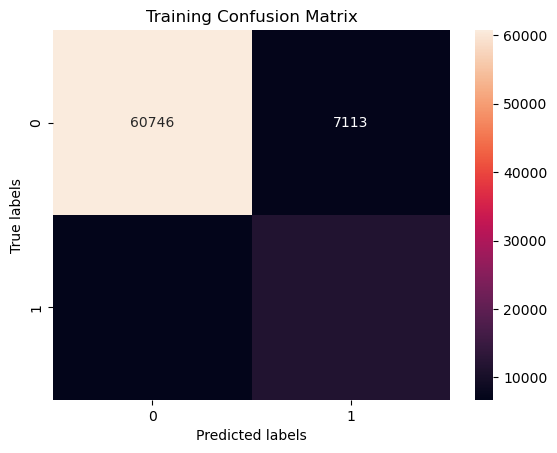

In [47]:
#Confusion matrix for training data.

ax= plt.subplot()
cm = confusion_matrix(y_test_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [113]:
# Decode using argmax.

y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(mlp.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[2897  466   61   38   15   25    3   29    3  134    7    2    0    2]
 [ 249  673   43   16    1   23    4   16    2   62    1    1    1    0]
 [  54   70   37    9    3   11    0    5    0   24    0    0    1    0]
 [  13   32    6   10    4    6    2    0    2    7    0    0    0    0]
 [   7   11    5    0    0    2    1    0    0    3    0    0    0    0]
 [  16   13    6    4    1   10    1    2    0   26    0    1    0    2]
 [   3    2    1    0    1    0    0    2    0    2    0    0    0    0]
 [  14    7    8    1    3    3    0   13    0   10    2    0    0    0]
 [   5    0    0    0    1    0    0    0    0    3    0    0    0    0]
 [ 132   59    6    1    2   16    0    8    0  232    0    2    0    0]
 [   3    2    0    0    0    0    0    0    0    0    2    1    0    0]
 [   1    0    2    0    0    0    0    0    0    2    0    0    0    0]
 [   0    1    1    1    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    1   